In [1]:
import pandas as pd

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [3]:
AMSdata = pd.read_parquet('ams_patterned_norm.pq')
AMSlabels = pd.read_csv('ams_cluster_labels_10.csv', index_col=0)

In [5]:
AMSdata = AMSdata.drop(columns="cluster")

In [6]:
AMSlabels

,cluster,uID
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4
...,...,...
252380,5,19452
252381,5,19453
252382,5,19454
252383,5,19455


In [7]:
ams = AMSdata.merge(AMSlabels, on="uID")

In [8]:
ams

,uID,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,...,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson,cluster
0,0,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,2
1,1,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,2
2,2,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,...,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924,2
3,3,0.943433,1.084128,-0.198643,2.919743,2.612026,1.364034,2.640811,3.506598,0.911405,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,2
4,4,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,...,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252380,19452,1.431831,0.258860,-0.453472,1.422329,2.160767,1.044623,-0.034803,-0.196324,-0.227110,...,-0.965272,0.605287,1.947502,1.867760,0.203535,-0.645944,-0.489598,2.213055,1.104647,5
252381,19453,1.390788,0.275483,-0.452804,1.457578,2.238153,1.138601,0.064791,0.219800,0.579435,...,-1.117181,0.893285,1.947502,1.867760,-0.056267,-0.858392,-0.733692,1.630388,1.074985,5
252382,19454,1.737126,-0.577250,-0.471851,0.642903,2.346958,1.932596,-0.055894,0.166560,1.457609,...,-1.038957,-0.885990,1.761087,1.506825,-1.042921,-0.932765,-0.871893,-0.345487,-0.591430,5
252383,19455,1.737126,-0.577250,-0.471851,0.642903,2.346958,1.932596,-0.055894,0.166560,1.457609,...,-1.038957,-0.885990,1.761087,1.506825,-1.042921,-0.932765,-0.871893,-0.345487,-0.591430,5


In [10]:
PRGdata = pd.read_parquet('prague_patterned_norm.pq')
PRGlabels = pd.read_csv('prg_cluster_labels_10.csv', index_col=0)

In [12]:
prg = PRGdata.merge(PRGlabels, on="uID")

In [14]:
prg = prg.set_index("uID")

In [15]:
ams = ams.set_index("uID")

In [17]:
for i in AMSdata.columns:
    if i not in PRGdata.columns:
        print(i)

In [18]:
ams['cluster'] = ams['cluster'].apply(lambda x: 'AMS_' + str(x))

In [19]:
prg['cluster'] = prg['cluster'].apply(lambda x: 'PRG_' + str(x))

In [21]:
data = ams.append(prg)

In [22]:
group = data.groupby('cluster').median()

In [23]:
group

,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,sscCCo_meanIQ3,...,ldsCDL_simpson,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson
cluster,,,,,,,,,,,,,,,,,,,,,
AMS_0,-0.064491,-0.717577,-0.447267,-0.333345,-0.527245,-0.562791,-0.258047,-0.322920,-0.508058,-0.717978,...,-0.549614,0.473170,-0.185928,-0.309659,-0.298185,-0.175639,0.193299,0.070270,-0.224863,0.052627
AMS_1,-0.389249,-0.603138,-0.443623,-0.536519,-0.710002,-0.738306,-0.278804,-0.361787,-0.764919,-0.310499,...,1.264823,-0.532603,0.022382,-0.021361,-0.090066,-0.280757,0.042372,0.305845,-0.294520,-0.157486
AMS_2,0.339657,1.116472,-0.105201,1.392185,1.331307,0.432457,0.660202,0.897332,0.390955,1.784215,...,0.560367,1.435612,0.957706,1.947502,1.867760,1.529668,0.782879,0.014494,1.671112,0.519276
AMS_3,0.290233,0.460709,-0.261907,0.286086,0.458452,0.277067,0.002703,0.041490,0.381805,0.636368,...,-0.768276,0.948672,-0.730516,-0.235868,-0.197679,-0.462848,-0.941611,-1.175091,-0.392327,-1.077109
AMS_4,0.366710,0.572644,-0.234838,4.047575,3.170407,0.637918,4.415461,5.264174,0.432317,2.575673,...,-1.185996,0.684831,-0.880317,0.182192,0.499699,0.448290,-1.103822,-1.476253,0.637759,-1.279406
AMS_5,-0.240215,-0.583865,-0.387154,-0.072682,-0.082956,0.043216,-0.181530,-0.197039,0.303929,-0.056838,...,-0.286408,-0.617349,-0.394641,-0.409539,-0.426711,-0.262751,-0.350974,-0.252719,-0.341623,-0.349415
AMS_6,0.154560,-0.060563,-0.367726,-0.146855,-0.133662,0.075145,-0.188022,-0.215663,0.218380,-0.139837,...,-0.604815,-0.065525,-0.536033,-0.411443,-0.355747,-0.433123,-0.643064,-0.682229,-0.385447,-0.592328
AMS_7,0.118328,-0.148930,-0.418931,-0.462232,-0.203063,0.001455,-0.275736,-0.315283,-0.295650,-0.086096,...,1.164370,-0.646963,0.165476,-0.382071,-0.388926,-0.360580,0.172031,0.836470,-0.510433,0.247051
AMS_8,0.120325,-0.568656,-0.441720,-0.534201,-0.707686,-0.755296,-0.281639,-0.356207,-0.739422,-0.323061,...,0.451067,-0.506292,0.008601,-0.092166,-0.060211,-0.170029,0.089843,0.869502,-0.221660,0.311436


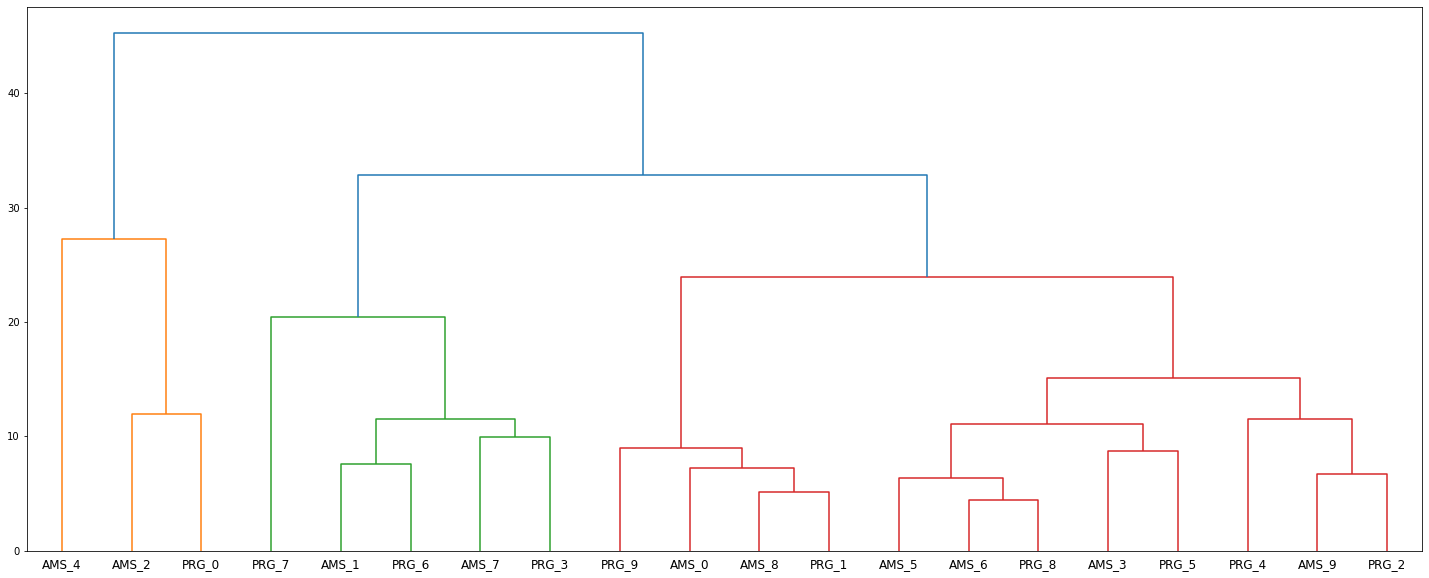

In [24]:
Z = hierarchy.linkage(group, 'ward')
plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, color_threshold=30, labels=group.index)
plt.savefig('200311_dengrogram_mixed.svg')